In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import torch
import numpy as np
import torch.nn.functional as F

In [5]:
data = pd.read_csv('./BUS_project/Data/A_bus/data_weekdays.csv')

,bus_id,route_id,type,station_id,arrival_time,latitude,longitude,station_order,name,trip_order,global_order,timestamp,time_mean,uncertainty
27614,BS34047D,00N81,2,B_YH0191,2021-11-01 00:00:48,22.519446,113.935453,1,滨海之窗南,1,1,48.0,48.0,0.0
27615,BS34047D,00N81,2,B_YH0284,2021-11-01 00:03:16,22.516944,113.936793,2,海岸城,1,1,196.0,196.0,0.0
27616,BS34047D,00N81,2,B_YH0016,2021-11-01 00:06:11,22.514648,113.933769,3,电力花园,1,1,371.0,371.0,0.0
27617,BS34047D,00N81,2,B_YH0290,2021-11-01 00:07:08,22.514907,113.929199,4,佳嘉豪苑,1,1,428.0,428.0,0.0
27618,BS34047D,00N81,2,B_YH0303,2021-11-01 00:08:53,22.515565,113.927186,5,南山书城地铁站①,1,1,533.0,533.0,0.0
27619,BS34047D,00N81,2,B_YH0283,2021-11-01 00:11:21,22.528346,113.929843,6,桂庙新村,1,1,681.0,681.0,0.0
27620,BS34047D,00N81,2,B_YH0034,2021-11-01 00:13:43,22.533842,113.932150,7,深圳大学,1,1,823.0,823.0,0.0
27621,BS34047D,00N81,2,B_YH0301,2021-11-01 00:16:28,22.539280,113.938288,8,深大北门②,1,1,988.0,988.0,0.0
27622,BS34047D,00N81,2,B_YH0234,2021-11-01 00:18:09,22.539671,113.946817,9,科技园②,1,1,1089.0,1089.0,0.0
27623,BS34047D,00N81,2,B_YH0275,2021-11-01 00:20:58,22.540128,113.955469,10,大冲②,1,1,1258.0,1258.0,0.0


In [15]:
df = data.loc[data.timestamp>=86400,:]
# np.where(np.diff(df.station_order.values)<0)[0]
df

,bus_id,route_id,type,station_id,arrival_time,latitude,longitude,station_order,name,trip_order,global_order,timestamp,time_mean,uncertainty
53209,BS04126D,02040,2,B_NS0146,2021-11-02 00:02:04,22.493651,113.891365,39,月亮湾花园东,8,116,86524.0,86394.833333,116.878427
53210,BS04126D,02040,2,A1B0002,2021-11-02 00:04:33,22.494413,113.894186,40,荔山工业园总站,8,116,86673.0,86544.833333,109.605505
55519,BS08576D,02040,1,C_GY0029,2021-11-02 00:00:32,22.541633,114.109619,41,深圳书城,8,115,86432.0,86294.500000,194.454365
55520,BS08576D,02040,1,C_GY0046,2021-11-02 00:03:02,22.542470,114.114348,42,人民桥,8,115,86582.0,86445.500000,193.040151
55521,BS08576D,02040,1,C_NH0082,2021-11-02 00:06:00,22.540991,114.118640,43,国贸,8,115,86760.0,86627.500000,187.383297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347329,BS36565D,M2093,1,E_XX0758,2021-11-08 00:08:53,22.597523,113.882291,32,凤岗小学,4,96,86933.0,87185.714286,332.374144
1347330,BS36565D,M2093,1,E_XX0024,2021-11-08 00:11:56,22.599560,113.886384,33,铁岗村,4,96,87116.0,87352.142857,323.578135
1347331,BS36565D,M2093,1,E_XX0759,2021-11-08 00:14:39,22.598973,113.890015,34,铁岗公园,4,96,87279.0,87508.428571,316.928413
1347332,BS36565D,M2093,1,E_XX0656,2021-11-08 00:17:46,22.601723,113.891528,35,易瑞生物,4,96,87466.0,87666.857143,316.666190


In [29]:
data = pd.read_csv('./data_used/data_toyset.csv')
data = data.sort_values(by=['global_order','date'])
data = data.loc[data.route_info=='1/00740', :]
data

,station_order,global_order,timestamp,route_info,route_id,type,date
950,1,1,22405.0,1/00740,00740,1,1
951,2,1,22556.0,1/00740,00740,1,1
952,3,1,22622.0,1/00740,00740,1,1
953,4,1,22707.0,1/00740,00740,1,1
954,5,1,22787.0,1/00740,00740,1,1
...,...,...,...,...,...,...,...
123039,34,110,62703.0,1/00740,00740,1,30
123040,35,110,62830.0,1/00740,00740,1,30
123041,36,110,63140.0,1/00740,00740,1,30
123042,37,110,63189.0,1/00740,00740,1,30


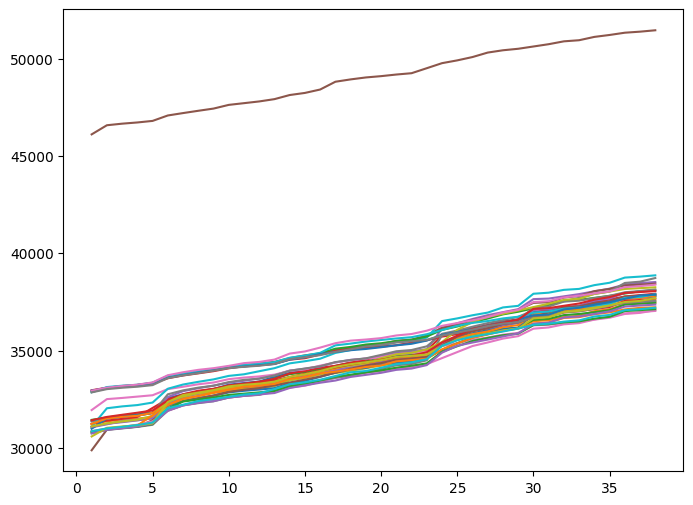

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
# 展示异常值：
aim_global_order = 35
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(1,31):
    tmp_data = data.loc[(data.date==i)&(data.global_order==aim_global_order),'timestamp']
    ax.plot(list(range(1,39)), tmp_data, label = i)
plt.show()
plt.clf()


In [24]:
data25 = data.loc[(data.date==25)&(data.global_order==aim_global_order),'timestamp']
data26 = data.loc[(data.date==26)&(data.global_order==aim_global_order),'timestamp']
data27 = data.loc[(data.date==27)&(data.global_order==aim_global_order),'timestamp']
ax.plot(list(range(1,39)), data25, color="green")
ax.plot(list(range(1,39)), (data25.values+data27.values)/2, color="red")
ax.plot(list(range(1,39)), data27, color="blue")
plt.show()
plt.clf()

print(data26)
data.loc[(data.date==26)&(data.global_order==aim_global_order),'timestamp'] = (data25.values+data27.values)/2
newdata26 = data.loc[(data.date==26)&(data.global_order==aim_global_order),'timestamp']
print(newdata26)

107806    46103.0
107807    46572.0
107808    46653.0
107809    46715.0
107810    46795.0
107811    47074.0
107812    47197.0
107813    47315.0
107814    47428.0
107815    47618.0
107816    47706.0
107817    47795.0
107818    47913.0
107819    48124.0
107820    48232.0
107821    48407.0
107822    48807.0
107823    48927.0
107824    49027.0
107825    49094.0
107826    49177.0
107827    49245.0
107828    49502.0
107829    49761.0
107830    49904.0
107831    50075.0
107832    50305.0
107833    50423.0
107834    50500.0
107835    50617.0
107836    50735.0
107837    50882.0
107838    50939.0
107839    51110.0
107840    51209.0
107841    51325.0
107842    51379.0
107843    51450.0
Name: timestamp, dtype: float64
107806    31839.0
107807    32011.0
107808    32094.5
107809    32170.5
107810    32307.5
107811    32822.5
107812    33033.0
107813    33162.5
107814    33246.0
107815    33398.5
107816    33514.0
107817    33579.5
107818    33676.0
107819    33959.5
107820    34082.5
107821    3424

<Figure size 640x480 with 0 Axes>

In [25]:
from sklearn.preprocessing import  StandardScaler 

scaler = StandardScaler()
scaler.fit(data['timestamp'].values.reshape(-1,1))
print(scaler.mean_,scaler.var_)
data.loc[:,'timestamp'] = scaler.fit_transform(data['timestamp'].values.reshape(-1,1))

[42443.69208134] [1.20800694e+08]


In [89]:
## train
# train = data.loc[~data.global_order.isin([71,79,72,28,78,49,42,73,11,3,102,40,81,90,61,91,5,50,44,88]),:]
# train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/train.csv', index=False)
# train = data.loc[data.global_order.isin([49,42,73,11,3,102,40,81,90,61,91,5,50,44,88]),:]
# train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/val.csv', index=False)
# train = data.loc[data.global_order.isin([71,79,72,28,78]),:]
# train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/test.csv', index=False)

train = data.loc[data.date<=26,:]
train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/train.csv', index=False)
train = data.loc[(data.date>26)&(data.date<=29),:]
train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/val.csv', index=False)
train = data.loc[data.date==30,:]
train.to_csv('D:/A-bus/BATP/data/dataset/1-00720-step/test.csv', index=False)

In [82]:
 # X = np.stack([np.roll(ts, i, axis = 0) for i in range(lags, 0, -1)], axis = 1)[33:-5,]
X_train, Y_train = [], []
train = pd.read_csv('D:/A-bus/BATP/data/dataset/1-00720-step/test.csv')
for i in range(min(train.date), max(train.date)+1):
    for j in range(min(train.global_order), max(train.global_order)+1):
        time_df = train.loc[(train.date==i)&(train.global_order==j), 'station_order']
        X = np.stack([np.roll(time_df, i, axis = 0) for i in range(33, 0, -1)], axis = 1)
        Y = np.stack([np.roll(time_df, -i, axis = 0) for i in range(0, 5, 1)], axis = 1)
        if i == min(train.date) and j == min(train.global_order):
            X_train,Y_train = X,Y
        else:
            X_train = np.concatenate((X_train, X), axis=0)
            Y_train = np.concatenate((Y_train, Y), axis=0)


In [83]:
print(Y_train.shape)
# Y_train = Y_train.reshape(-1,5,38)
# Y_train = Y_train[:,:,:,np.newaxis,np.newaxis]
Y_train

(4180, 5)


array([[ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       ...,
       [36, 37, 38,  1,  2],
       [37, 38,  1,  2,  3],
       [38,  1,  2,  3,  4]], dtype=int64)

In [27]:
### shuffle index of origin data, len=434
data = data.groupby(['global_order','route_info'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
data = data.loc[data.route_info=='1/00740']
data = shuffle(data)
data = data.reset_index(drop=True)
data

,global_order,route_info,timestamp
0,36,1/00740,"[-1.0375541392052743, -0.9727734925651409, -0...."
1,30,1/00740,"[-1.1398202162045858, -1.126991464552537, -1.1..."
2,108,1/00740,"[1.3780725016592499, 1.4100988887622372, 1.418..."
3,40,1/00740,"[-0.8782410601787665, -0.8641385317669397, -0...."
4,9,1/00740,"[-1.620397990857935, -1.6069323508259972, -1.6..."
...,...,...,...
105,60,1/00740,"[-0.18139418852598338, -0.13171689489464514, -..."
106,100,1/00740,"[1.1257737191689552, 1.1789993909168175, 1.186..."
107,54,1/00740,"[-0.3691852765389543, -0.32796949995471214, -0..."
108,93,1/00740,"[0.8833921985940741, 0.9065021483786161, 0.914..."


In [9]:
Train_path = './prediction_dataset/train.txt'
data_train = data.loc[:90,'timestamp'].reset_index(drop=True)
saveFile = open(Train_path,'a')
for i in range(len(data_train)):
    lineToWrite = data_train[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()
TrainOrder = './prediction_dataset/train_order.txt'
trainOrder = data.loc[:90,'global_order'].reset_index(drop=True)
saveOrder = open(TrainOrder,'a')
for i in range(len(trainOrder)):
    lineToWrite = trainOrder[i]
    saveOrder.write(f"{lineToWrite}\n")
saveOrder.close()

Val_path = './prediction_dataset/val.txt'
data_val = data.loc[90:105,'timestamp'].reset_index(drop=True)
saveFile = open(Val_path,'a')
for i in range(len(data_val)):
    lineToWrite = data_val[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()
ValOrder = './prediction_dataset/val_order.txt'
valOrder = data.loc[90:105,'global_order'].reset_index(drop=True)
saveOrder = open(ValOrder,'a')
for i in range(len(valOrder)):
    lineToWrite = valOrder[i]
    saveOrder.write(f"{lineToWrite}\n")
saveOrder.close()

Test_path = './prediction_dataset/test.txt'
data_test = data.loc[105:,'timestamp'].reset_index(drop=True)
saveFile = open(Test_path,'a')
for i in range(len(data_test)):
    lineToWrite = data_test[i]
    saveFile.write(f"{lineToWrite}\n")
saveFile.close()
TestOrder = './prediction_dataset/test_order.txt'
testOrder = data.loc[105:,'global_order'].reset_index(drop=True)
saveOrder = open(TestOrder,'a')
for i in range(len(testOrder)):
    lineToWrite = testOrder[i]
    saveOrder.write(f"{lineToWrite}\n")
saveOrder.close()

constract the dataset for KNN
time begin with 0
add lat and lon, helping to interpolate

In [30]:
data_ = data.copy()
data_ = data_.loc[data_.route_info=='1/00740',:]
data_ = data_.reset_index(drop=True)
# ### add trip_num, helping to group same trip
station_diff = np.where(np.diff(data_['station_order'])==-37)[0]+1
a = np.array([i+1 for i in range(len(station_diff)+1)])
data_['trip_num'] = np.repeat(a,38)
# ### make time of trip is relative to the first station
data_ = data_.groupby(['trip_num'],as_index=False)['timestamp'].agg({'timestamp': lambda x:x.tolist()})
data_.timestamp = data_.timestamp.apply(lambda x: [i-x[0] for i in x])
data_

,trip_num,timestamp
0,1,"[0.0, 151.0, 217.0, 302.0, 382.0, 648.0, 754.0..."
1,2,"[0.0, 133.0, 204.0, 293.0, 383.0, 733.0, 861.0..."
2,3,"[0.0, 184.0, 249.0, 318.0, 402.0, 665.0, 778.0..."
3,4,"[0.0, 180.0, 246.0, 320.0, 406.0, 686.0, 812.0..."
4,5,"[0.0, 133.0, 203.0, 269.0, 352.0, 656.0, 792.0..."
...,...,...
3295,3296,"[0.0, 487.0, 573.0, 635.0, 711.0, 907.0, 1104...."
3296,3297,"[0.0, 537.0, 625.0, 689.0, 795.0, 1097.0, 1200..."
3297,3298,"[0.0, 295.0, 374.0, 439.0, 534.0, 902.0, 1037...."
3298,3299,"[0.0, 211.0, 310.0, 413.0, 479.0, 736.0, 837.0..."


In [31]:
### interpolate 10m
l = [380,
 200,
 280,
 470,
 2890,
 780,
 750,
 560,
 560,
 320,
 280,
 240,
 1460,
 460,
 690,
 380,
 570,
 320,
 360,
 620,
 440,
 510,
 1330,
 1270,
 1320,
 550,
 350,
 380,
 410,
 340,
 640,
 220,
 360,
 410,
 780,
 140,
 70]
l = [int(i/10) for i in l]
l = np.cumsum(l)   # test: l[2:] 按行累加
time = data_.timestamp[0]
l

array([  38,   58,   86,  133,  422,  500,  575,  631,  687,  719,  747,
        771,  917,  963, 1032, 1070, 1127, 1159, 1195, 1257, 1301, 1352,
       1485, 1612, 1744, 1799, 1834, 1872, 1913, 1947, 2011, 2033, 2069,
       2110, 2188, 2202, 2209])

In [32]:
def func(time):
 time_array = np.linspace(time[0],time[1],5)
 distance_array = np.linspace(0,l[0],5)
 for i in range(1,len(l)):
   index = np.linspace(time[i],time[i+1],5)
   time_array = np.concatenate((time_array,index[1:]))
   index = np.linspace(l[i-1],l[i],5)
   distance_array = np.concatenate((distance_array,index[1:]))
 coord = []
 for a, b in zip(distance_array,time_array):
     coord.append( [ a, b ] )
 return coord

# time_array = np.linspace(time[0],time[1],5)
# distance_array = np.linspace(0,l[0],5)
# time_array, distance_array
# for i in range(1,len(l)):
#   index = np.linspace(time[i],time[i+1],5)
#   time_array = np.concatenate((time_array,index[1:]))
#   index = np.linspace(l[i-1],l[i],5)
#   distance_array = np.concatenate((distance_array,index[1:]))
# coord = []
# for a, b in zip(distance_array,time_array):
#     coord.append( [ a, b ] )
# [coord[i] for i in range(0,150) if i%4==0]  # 每个站点之间插3个点

In [33]:
data_['coord'] = data_['timestamp'].apply(lambda x: func(x))
data_['coord']

0       [[0.0, 0.0], [9.5, 37.75], [19.0, 75.5], [28.5...
1       [[0.0, 0.0], [9.5, 33.25], [19.0, 66.5], [28.5...
2       [[0.0, 0.0], [9.5, 46.0], [19.0, 92.0], [28.5,...
3       [[0.0, 0.0], [9.5, 45.0], [19.0, 90.0], [28.5,...
4       [[0.0, 0.0], [9.5, 33.25], [19.0, 66.5], [28.5...
                              ...                        
3295    [[0.0, 0.0], [9.5, 121.75], [19.0, 243.5], [28...
3296    [[0.0, 0.0], [9.5, 134.25], [19.0, 268.5], [28...
3297    [[0.0, 0.0], [9.5, 73.75], [19.0, 147.5], [28....
3298    [[0.0, 0.0], [9.5, 52.75], [19.0, 105.5], [28....
3299    [[0.0, 0.0], [9.5, 70.75], [19.0, 141.5], [28....
Name: coord, Length: 3300, dtype: object

In [131]:
###'1/00740'  totoal:3300
saveTrain = './knn_dataset/train.csv'
data_train = data_['coord'].reset_index(drop=True)
pd.DataFrame(data_train).to_csv(saveTrain,index=False)